# Importing Libraries and Data

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/data/2023-data-scientists-jobs-descriptions/Jobs.csv')

In [3]:
df.head()

,Unnamed: 0,title,company,announcement,description
0,0,"Senior Analyst, Data Science and Analytics",TransUnion,The Muse,TransUnion's Job Applicant Privacy Notice Wha...
1,1,Senior Data Scientist,"Grubhub Holdings, Inc.",ZipRecruiter,About The Opportunity We're all about connect...
2,2,Lead Data Science Analyst,Discover Financial Services,LinkedIn,"Discover. A brighter future. With us, you’ll ..."
3,3,Data Science Intern,AbelsonTaylor,Startup Jobs,Are you a 2023 college graduate or rising coll...
4,4,Data Scientist,NORC at the University of Chicago,SimplyHired,"JOB DESCRIPTION: At NORC, Data Scientists pla..."


In [4]:
df.shape

(790, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    790 non-null    int64 
 1   title         790 non-null    object
 2   company       790 non-null    object
 3   announcement  790 non-null    object
 4   description   790 non-null    object
dtypes: int64(1), object(4)
memory usage: 31.0+ KB


# Exploratory Data Analysis

## Countplot of Title and Announcement

We will create a countplot to visualize the distribution of the different job titles in our dataset. This plot will provide us with a clear picture of the frequency of each job title.

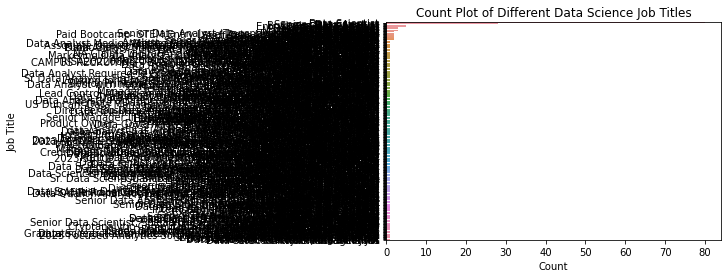

In [6]:
# Plot histogram of the different job titles in the dataset
sns.countplot(y= 'title', data = df, order = df['title'].value_counts().index)

# Add labels and titles
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.title('Count Plot of Different Data Science Job Titles')

plt.show()

This countplot is pretty useless as we can't make much of it. We will take a look at the different naming conventions for data science jobs in this dataset.

In [7]:
list_of_titles = df['title'].unique()
print('There are {} unique job titles for Data Scientist postings'.format(len(list_of_titles)))

There are 515 unique job titles for Data Scientist postings


We will create a countplot to visualize the distribution of the different job boards used in our dataset. This plot will provide us with a clear picture of the frequency of each job boards.

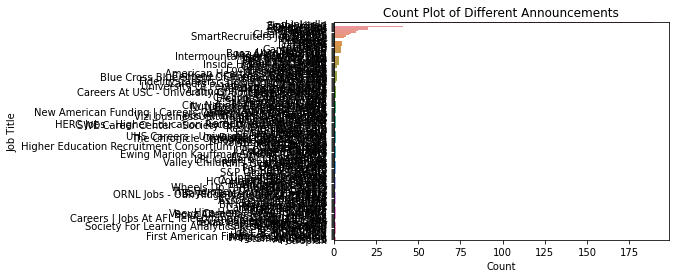

In [8]:
# Plot histogram of the different announcements in the dataset
sns.countplot(y= 'announcement', data = df, order = df['announcement'].value_counts().index)

# Add labels and titles
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.title('Count Plot of Different Announcements')

plt.show()

This countplot is pretty useless as we can't make much of it.

In [9]:
list_of_jobboards = df['announcement'].unique()
print('There are {} unique job boards used for Data Scientist postings'.format(len(list_of_jobboards)))

There are 203 unique job boards used for Data Scientist postings


# Data Cleaning

## Remove Duplicates

The same job could be posted on multiple different job boards. We will remove duplicates based on the job description. If two postings have the exact same job description, we will consider it the same job and leave only one.

In [10]:
# check for duplicates
duplicates = df['description'].duplicated()
df[duplicates]

,Unnamed: 0,title,company,announcement,description


## Cleaning Job Titles

In [11]:
df['title'].unique()

array(['Senior Analyst, Data Science and Analytics',
       'Senior Data Scientist', 'Lead Data Science Analyst',
       'Data Science Intern', 'Data Scientist',
       'Senior Solutions Architect (Data Science)',
       'Data Scientist - Research, Development & Construction',
       'Data Science Manager - S&A Strategy',
       'Senior/Principal Data Scientist', 'Data Science Analyst',
       'Senior Data Scientist - Knowledge Management',
       'Data Scientist, Consultant', 'Senior-Data Scientist',
       'Staff Data Scientist', 'Data Science Internship',
       'Undergrad Intern – Data Science Program (Summer 2023)',
       'Data Science, Department of Information Technology - Adjunct Faculty',
       'Summer 2023 Intelligent Sensors Data Science Intern',
       'Associate Director Data Science',
       'Data Science Senior Advisor (Solution Value Analytics) - Evernorth',
       'Director, Data Science',
       'Senior Manager, Institutional Data Analytics and Reporting',
       'D

Looking at the 515 different job titles, a lot of the job titles are similar with one another, however they are just written differently. Additionally there are lot of non data scientist roles such as *Analysts*,*Managers*, etc. We can write a function to try and clean up the *title* column to better visualize the distribution of different data science jobs posted.

First lets filter out the jobs that do not contain *Data Scientist* or *data science* in the job title

In [12]:
df['title'] = df['title'].str.lower()

mask1 = df['title'].str.contains('data science')
mask2 = df['title'].str.contains('data scientist')

mask = mask1 | mask2
df = df[mask]

In [13]:
df['title'].unique()

array(['senior analyst, data science and analytics',
       'senior data scientist', 'lead data science analyst',
       'data science intern', 'data scientist',
       'senior solutions architect (data science)',
       'data scientist - research, development & construction',
       'data science manager - s&a strategy',
       'senior/principal data scientist', 'data science analyst',
       'senior data scientist - knowledge management',
       'data scientist, consultant', 'senior-data scientist',
       'staff data scientist', 'data science internship',
       'undergrad intern – data science program (summer 2023)',
       'data science, department of information technology - adjunct faculty',
       'summer 2023 intelligent sensors data science intern',
       'associate director data science',
       'data science senior advisor (solution value analytics) - evernorth',
       'director, data science',
       'data scientist, ts/sci with polygraph jobs',
       'data scientist/an

In [14]:
print('There are {} unique job titles for Data Scientist postings'.format(len(df['title'].unique())))

There are 191 unique job titles for Data Scientist postings


We have reduced the number of unique job titles down to 191 by removing titles that include the substrings 'data science' or 'data scientist'.

We'll write a function to group these data science job postings into one of the following:
* Lead Data Scientist
* Senior Data Scientist
* Data Science Manager
* Intern Data Scientist
* VP of Data Science
* Director of Data Science
* Staff Data Scientist
* Junior Data Scientist
* Data Scientist

In [15]:
# A function that replaces the job title if it contains a certain sub string.
def replace_title(title):
    """
    Takes the job title name and categorizes into one of the following: Lead Data Scientist, Senior Data Scientist,
    Data Science Manager, Intern Data Scientist, VP of Data Science, Staff Data Scientist, Junior Data Scientist, or Data Scientist.

    Input:
        title: job title
    Output:
        title: job title place into one of the provided categories
    """
    # Lowercase the titles first to keep consistency    
    if 'lead' in title or 'principal' in title or 'founding' in title:
        return 'Lead Data Scientist'
    elif 'senior' in title or 'sr' in title:
        return 'Senior Data Scientist'
    elif 'manager' in title:
        return 'Data Science Manager'
    elif 'intern' in title:
        return 'Intern Data Scientist'
    elif 'vp' in title or 'vice president' in title:
        return 'VP of Data Science'
    elif 'director' in title:
        return 'Director of Data Science'
    elif 'staff' in title:
        return 'Staff Data Scientist'
    elif 'jr' in title or 'junior' in title:
        return 'Junior Data Scientist'
    elif 'data scientist' in title or 'data science' in title: 
        return 'Data Scientist'
    else:
        return title

# Apply function to title column
df['title'] = df['title'].apply(replace_title)

In [16]:
df['title'].unique()

array(['Senior Data Scientist', 'Lead Data Scientist',
       'Intern Data Scientist', 'Data Scientist', 'Data Science Manager',
       'Staff Data Scientist', 'Director of Data Science',
       'VP of Data Science', 'Junior Data Scientist'], dtype=object)

In [17]:
print('There are {} unique job titles for Data Scientist postings'.format(len(df['title'].unique())))

There are 9 unique job titles for Data Scientist postings


We will create a countplot to visualize the distribution of the different Data Science job titles used in our dataset. This plot will provide us with a clear picture of the frequency of each job title.

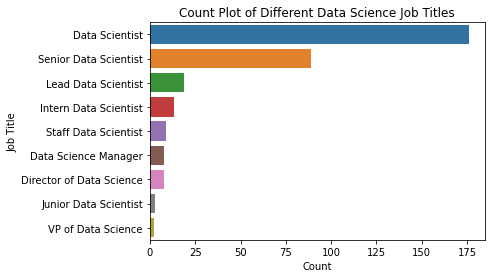

In [18]:
# Plot histogram of the different job titles in the dataset
sns.countplot(y= 'title', data = df, order = df['title'].value_counts().index)

# Add labels and titles
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.title('Count Plot of Different Data Science Job Titles')

plt.show()

We can see that the job title that appears the most in our data set is "Data Scientist". However, it is important to note that just because it is "Data Scientist", it does not mean it isn't a Senior, Staff, Junior, or Intern level position. They simply did not specify the level of the job in the job title. They may state the level of the position in the job description.

# Text Analysis

Let's take a look at the job descriptions

In [19]:
df['description']

0      TransUnion's Job Applicant Privacy Notice  Wha...
1      About The Opportunity  We're all about connect...
2      Discover. A brighter future.  With us, you’ll ...
3      Are you a 2023 college graduate or rising coll...
4      JOB DESCRIPTION:  At NORC, Data Scientists pla...
                             ...                        
326    Dice is the leading career destination for tec...
584    Secure our Nation, Ignite your Future  Join th...
694    Company Overview:  Join the world’s only threa...
698    An exciting career awaits you  At MPC, we're c...
700    We are looking for a expert level and experien...
Name: description, Length: 327, dtype: object

In [20]:
# Visualize the distribution of words use in job descriptions

# Create a new column called word count
df['word_count'] = df['description'].str.split().str.len()

In [21]:
summary = df['word_count'].describe(percentiles = [0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.00])
summary

count     327.000000
mean      668.584098
std       287.396113
min        37.000000
10%       301.000000
20%       408.200000
30%       491.000000
40%       583.400000
50%       660.000000
60%       761.600000
70%       828.000000
80%       904.600000
90%      1026.800000
100%     1481.000000
max      1481.000000
Name: word_count, dtype: float64

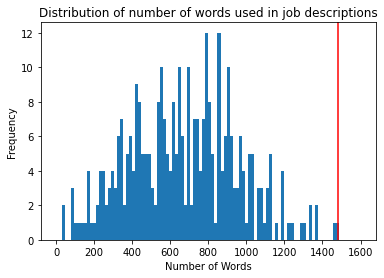

In [22]:
# Plot the distribution of the word numbers per description
df['word_count'].plot.hist(xticks = [0, 200, 400, 600, 800, 1000, 1200, 1400, 1600], bins = 100, range = [0, 1600]).axvline(x= summary['100%'], c = 'red')

plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of number of words used in job descriptions')
plt.show()

By analyzing the number of words used in the job descriptions, we can see that it follows a normal distribution pattern. This indicates that the majority of the job descriptions have a similar number of words. This also shows that the job descriptions are not too lengthy or too short, but follow a standard length.

## Extract Skills and Tools From Job Descriptions

## Phrase Matching with Fuzzy

fuzzy string matching and phrasematching can provide a powerful tool for extracting relevant skills from job postings

In [34]:
from fuzzywuzzy import fuzz

# list of skills to match
tools = ["Python","R","SQL","Jupyter","NumPy","Pandas","Matplotlib","Seaborn",
                      "SciPy","Scikit-Learn","TensorFlow","PyTorch","Keras","XGBoost","LightGBM",
                      "Plotly","Dask","Spark","Hadoop","AWS","Google Cloud",
                      "Azure","IBM Watson","NLTK","OpenCV","Gensim","StatsModels",
                      "Theano","Caffe","Keras-Tuner","Auto-Keras","Auto-Sklearn","Shap","ELI5","Bokeh",
                      "Folium","ggplot","plotnine","Geopandas","Datashader","Yellowbrick","H2O.ai","Flask",
                      "Dash","Streamlit","FastAPI","PySpark","TensorBoard","cuDF","NetworkX","BeautifulSoup",
                      "Scrapy","Numba","Cython", "Apache", "Git"]

def match_phrases(description, phrases):
    """
    Looks at the job description and see if any phrases from the phrases input are identified in the job description.

    Input:
        description: the job description
        phrases: list of phrases we want to look for
    Output:
        unique_matches: return a list of unique phrases matched in the job description.
    """
    matched_phrase = [phrase for phrase in phrases if fuzz.partial_token_set_ratio(description, phrase) >= 90]
    # Only return matches once
    unique_matches = list(set(matched_phrase))
    return unique_matches

df['Tools'] = df['description'].apply(lambda x: match_phrases(x, skills))

Function that will help us visualize the results of our phrase matching

In [57]:
import collections
# Visualization functions
    
# Function used to generate countplot 
def generate_countplot(df, column, top_n = None):
    """
    Generate a countplot showing the top_n phrases and how many times they occured throughout all the job description in the dataset.

    Input:
        df: The dataframe we are working with
        column: column name containing the unique list of phrases matched
        top_n: either left blank, or provide an integer value indicating you want the top n most frequent phrases to be plotted
    Output:
        None
    """
    words = [word for row in df[column] for word in row]
    
    counter = collections.Counter(words)
    
    top_n_words = [word for word, count in counter.most_common(top_n)]
    
    plt.figure(figsize = (10,5))
    
    sns.countplot(x = words, order = top_n_words)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation = 90)
    plt.show()

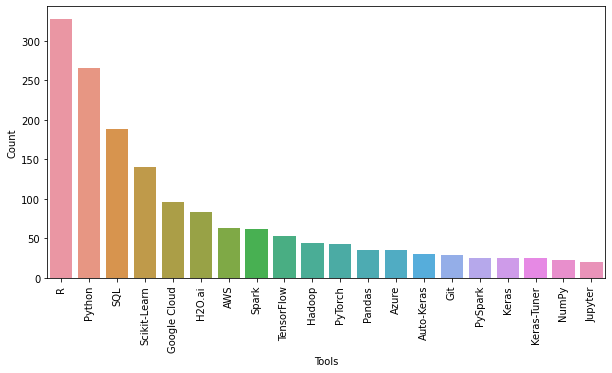

In [58]:
generate_countplot(df, 'Tools', 20)

As we can see from the this countplot, the most common tool asked for in data science job postings is R followed by Python.

## Tasks

We will be performing the same method we used previously.

In [44]:
tasks = ["Python programming", "Statistics" ,"Probability", "Machine learning","Data visualization","preprocessing" "cleaning","database management", "analysis", "modeling",    
         "Deep learning","Data engineering", "visualization", "manipulation", "Machine learning", "storage", "Cloud computing", "ETL",    
         "warehousing","governance", "security","storytelling", "product development", "Natural language processing", "NLP",    
         "Computer vision", "Business intelligence", "mining","feature engineering", "Time series analysis", "Regression analysis", "Classification algorithms",    
         "Clustering algorithms", "Neural networks", "Decision trees", "random forests", "Support vector machines", "SVM", "K-nearest neighbors", "KNN", "Reinforcement learning","Hyperparameter tuning",    
         "Ensemble learning", "Transfer learning", "Unsupervised learning","Supervised learning","Exploratory data analysis", "EDA", "quality control",    
         "Data interpretation", "Collaboration", "communication", "Project management", "Agile development", "Software engineering", "Version control", "Debugging", "troubleshooting",
         "Continuous integration and deployment (CI/CD)", "optimization", 'deployment']


df['Skills'] = df['description'].apply(lambda x: match_phrases(x, tasks))

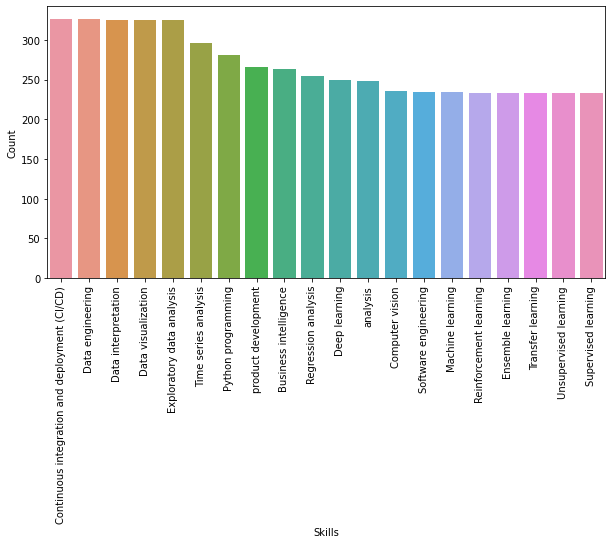

In [45]:
generate_countplot(df, 'Skills', 20)

As we can see from the this countplot, the most common skill asked for in data science job postings is CI/CD followed by Data Engineering.

## Years of Experience Needed

We will use regular expressions to extract the years of experience mentioned in a job posting by matching specific patterns in the text. By defining a regex pattern that matches the wording typically used to specify years of experience in a job posting, we can extract this information

In [46]:
import re 
from fuzzywuzzy import fuzz

def extract_years_of_experience(description):
    """
    Extract the years of experience asked for in the job description

    Input:
        description: the job description
    Output:
        number of years of experience. Or 'Not Specified' if not mentioned in description
    """
    # Regular expression pattern to match the years of experience information
    pattern = re.compile(r'(\d+\+?\s*years?\s*of\s*experience)', re.IGNORECASE)
    
    # search for the pattern in the job description
    match = re.search(pattern, description)
    
    # if there is a match, return the matched string
    if match:
        return match.group(0)
    else:
        return "Not Specified"
    
df['Years_of_Experience'] = df['description'].apply(extract_years_of_experience)

In [47]:
df['Years_of_Experience'].value_counts()

Not Specified              244
2+ years of experience      14
5+ years of experience      14
3+ years of experience       8
3 years of experience        8
4+ years of experience       6
10 years of experience       4
2 years of experience        4
7 years of experience        4
7+ years of experience       3
5 years of experience        3
4 years of experience        3
6+ years of experience       3
10+ years of experience      2
8+ years of experience       2
5  years of experience       1
6 years of experience        1
12 years of experience       1
1 year of experience         1
8 years of experience        1
Name: Years_of_Experience, dtype: int64

There are a lot job postings where the years of experience is not specifed. I find that hard to believe. Perhaps just worded differently and just doesn't match the regex pattern.

Changing the regex pattern to see if we can find more.

In [48]:
import re 
from fuzzywuzzy import fuzz

def extract_years_of_experience(description):
    """
    Extract the years of experience asked for in the job description

    Input:
        description: the job description
    Output:
        number of years of experience. Or 'Not Specified' if not mentioned in description
    """
    # Regular expression pattern to match the years of experience information
    pattern = re.compile(r'(\d+)\s*years?', re.IGNORECASE)
    
    # search for the pattern in the job description
    match = re.search(pattern, description)
    
    # if there is a match, return the matched string
    if match:
        return match.group(0)
    else:
        return "Not Specified"
    
df['Years_of_Experience'] = df['description'].apply(extract_years_of_experience)

In [49]:
df['Years_of_Experience'].value_counts()

Not Specified    212
3 years           22
5 years           18
2 years           12
7 years           12
6 years           10
10 years           8
8 years            6
4 years            5
18 years           4
1 year             4
12 years           2
125 years          2
237 years          2
5  years           1
25 years           1
30 years           1
2 Years            1
9 years            1
50 years           1
55 years           1
60 years           1
Name: Years_of_Experience, dtype: int64

We've reduced the number of Not Specified values by 32. However, we can see that there are some non valid values such as 125, 237, 25, 30, 50, 55, 60, and 18 years because 18 years is most likely an age you must be to apply for the posting. We'll remove these invalid years and add them to Not Specified.

In [50]:
# Extract just the numbers using regular expression
df['years'] = df['Years_of_Experience'].str.extract(r'(\d+)').fillna(0).astype(int)

In [51]:
df['years'].value_counts()

0      212
3       22
5       19
2       13
7       12
6       10
10       8
8        6
4        5
18       4
1        4
12       2
125      2
237      2
25       1
30       1
9        1
50       1
55       1
60       1
Name: years, dtype: int64

In [73]:
df['experience'] = df['years'].apply(lambda x: 'Not Specified' if x == 0 or x >= 18
                                    else ('1 to 3 years' if x >= 1 and x <= 3
                                    else ('4 to 6 years' if x >= 4 and x <= 6 
                                    else '6+ years')))

In [74]:
df['experience'].value_counts()

Not Specified    225
1 to 3 years      39
4 to 6 years      34
6+ years          29
Name: experience, dtype: int64

<AxesSubplot:xlabel='experience', ylabel='count'>

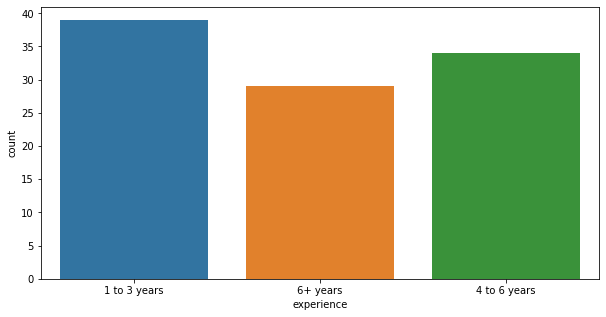

In [75]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'experience', data = df[df['experience'] != 'Not Specified'])


We can see of the job postings that do speciy years of experience, most job postings ask for 1 to 3 years of experience.

We can further analyze to see if the years of experience vary by data science job titles.

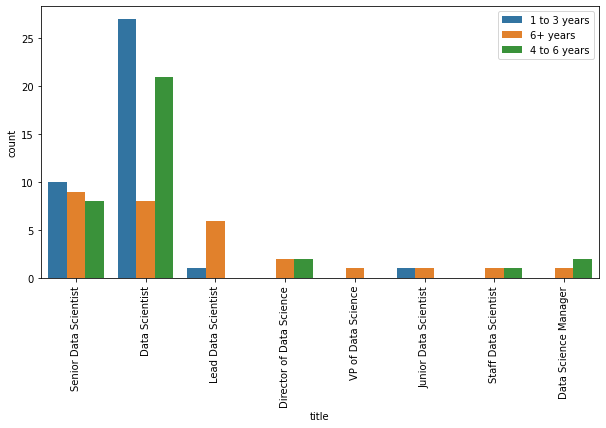

In [76]:
# Set size of figure
plt.figure(figsize = (10,5))

sns.countplot(data = df[df['experience'] != 'Not Specified'], x = 'title', hue = 'experience')
# rotate the x-axis labels by 90 degrees
plt.xticks(rotation = 90)
plt.legend(loc = 'upper right')
plt.show()

We can see that the years of experience do vary by job title. More senior-level data science positions (Senior Data Scientist, Lead Data Scientist, Director of Data Science, VP of Data Science, Staff Data Scientist, and Data Science Manager) mostly ask for 4 to 6 years of experience and 6+ years of experience.

## Extract Education Level

We will be using Fuzzy matching to extract the education level listed in job descriptions

In [70]:
import re 
import fuzzywuzzy
from fuzzywuzzy import fuzz

def extract_education_level(description):
    """
    Extract the level of education asked for in the job description
    
    Input:
        description: the job description
    Output:
        education_level: level of education asked for in job description. Returns 'Not Specified' if not provided in job description
    
    """

    # Dictionary that maps education levels to their abbreviations
    education_levels = {
        'bachelor': ['bs', 'bachelor'],
        'master': ['ms', 'master'],
        'phd': ['phd'],
        'doctorate': ['doctorate']
    }
    # initialize the education level and maximum ratio to 0
    education_level = None
    max_ratio = 0
    # iterate over the education levels and their abbreviations
    for level, abbreviations in education_levels.items():
        level_variants = [level] + abbreviations
        for variant in level_variants:
            # calculate the fuzzy matching ratio between the variant and the job description
            ratio = fuzz.partial_token_set_ratio(variant, description)
            if ratio > max_ratio:
                max_ratio = ratio
                education_level = level
    if max_ratio >= 80:
        return education_level
    else:
        return 'Not Specified'
    
df['Education_Level'] = df['description'].apply(extract_education_level)
    

<AxesSubplot:xlabel='Education_Level', ylabel='count'>

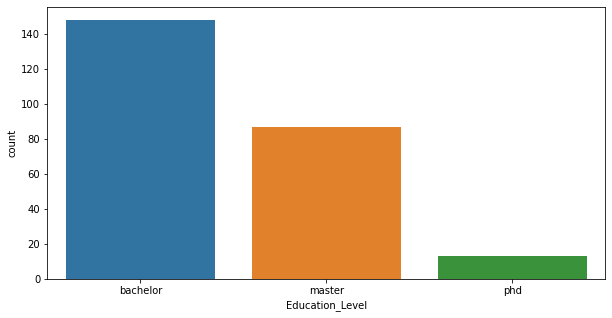

In [71]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'Education_Level', data = df[df['Education_Level'] != 'Not Specified'])

From the figure above, we can see that for the job postings that do ask for education requirements, the majority of job postings ask for a bachelor's degree, and some require a master's and Ph.D.

Let's gain some additional insight and see if the education level is dependent on the data science job level.

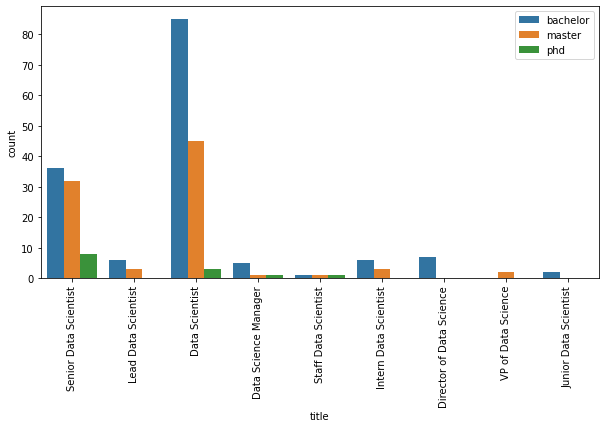

In [72]:
# Set size of figure
plt.figure(figsize = (10,5))

sns.countplot(data = df[df['Education_Level'] != 'Not Specified'], x = 'title', hue = 'Education_Level')
# rotate the x-axis labels by 90 degrees
plt.xticks(rotation = 90)
plt.legend(loc = 'upper right')
plt.show()


From the figure, from the more senior-level positions (Senior Data Scientist, Staff Data Scientist, VP of Data Science) we see an increase in education-level needed.

# Conclusion

In conclusion, by analyzing data science job postings posted in 2023, we can gain valuable insights into the current state of the field and the skills and requirements that are in high demand. Whether you are a job seeker or an employer, this information can help you make informed decisions about your future in the world of data science.